# Library

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Data

In [2]:
train = pd.read_csv('../data/train.csv', index_col=0)
test = pd.read_csv('../data/test.csv', index_col=0)

# describe

In [3]:
# データの概観
print("Train dataset shape:", train.shape)
print("Test dataset shape:", test.shape)

# 最初の5行を表示
print(train.head())

# データ情報の表示
train.info()

# 基本統計量の表示
print(train.describe())

Train dataset shape: (42307, 20)
Test dataset shape: (42308, 19)
   Term  NoEmp  NewExist  CreateJob  RetainedJob  FranchiseCode RevLineCr  \
0   163     21       1.0          0            0              1         N   
1    84      6       1.0          4            0              0         0   
2   242     45       1.0          4           90              0         N   
3   237      4       1.0          0            0              0         N   
4   184      0       1.0          0            0              0         N   

  LowDoc DisbursementDate  MIS_Status  Sector ApprovalDate  ApprovalFY  \
0      N        31-Jan-98           1       0    22-Sep-06        2006   
1      N        31-Oct-93           1      62    30-Jun-92        1992   
2      N        31-Aug-01           1      42    18-Apr-01        2001   
3      N        31-Aug-07           1      33     6-Oct-03        2004   
4      N         8-Jun-83           1       0    17-Dec-99        2000   

        City State BankStat

# 欠損値確認

In [4]:
# 欠損値の確認
print(train.isnull().sum())

Term                    0
NoEmp                   0
NewExist                0
CreateJob               0
RetainedJob             0
FranchiseCode           0
RevLineCr            1079
LowDoc                531
DisbursementDate      150
MIS_Status              0
Sector                  0
ApprovalDate            0
ApprovalFY              0
City                    0
State                   0
BankState              11
DisbursementGross       0
GrAppv                  0
SBA_Appv                0
UrbanRural              0
dtype: int64


# catの頻度分布

In [5]:
# カテゴリカルデータの頻度分布
print(train['Sector'].value_counts())

0     9798
42    7337
33    5050
44    3868
23    3867
61    2505
72    2478
22    1998
62    1191
53     896
32     865
56     672
45     351
71     337
51     301
54     267
81     169
31     138
52      84
49      65
55      29
21      28
11       7
48       6
Name: Sector, dtype: int64


# numのヒストグラム

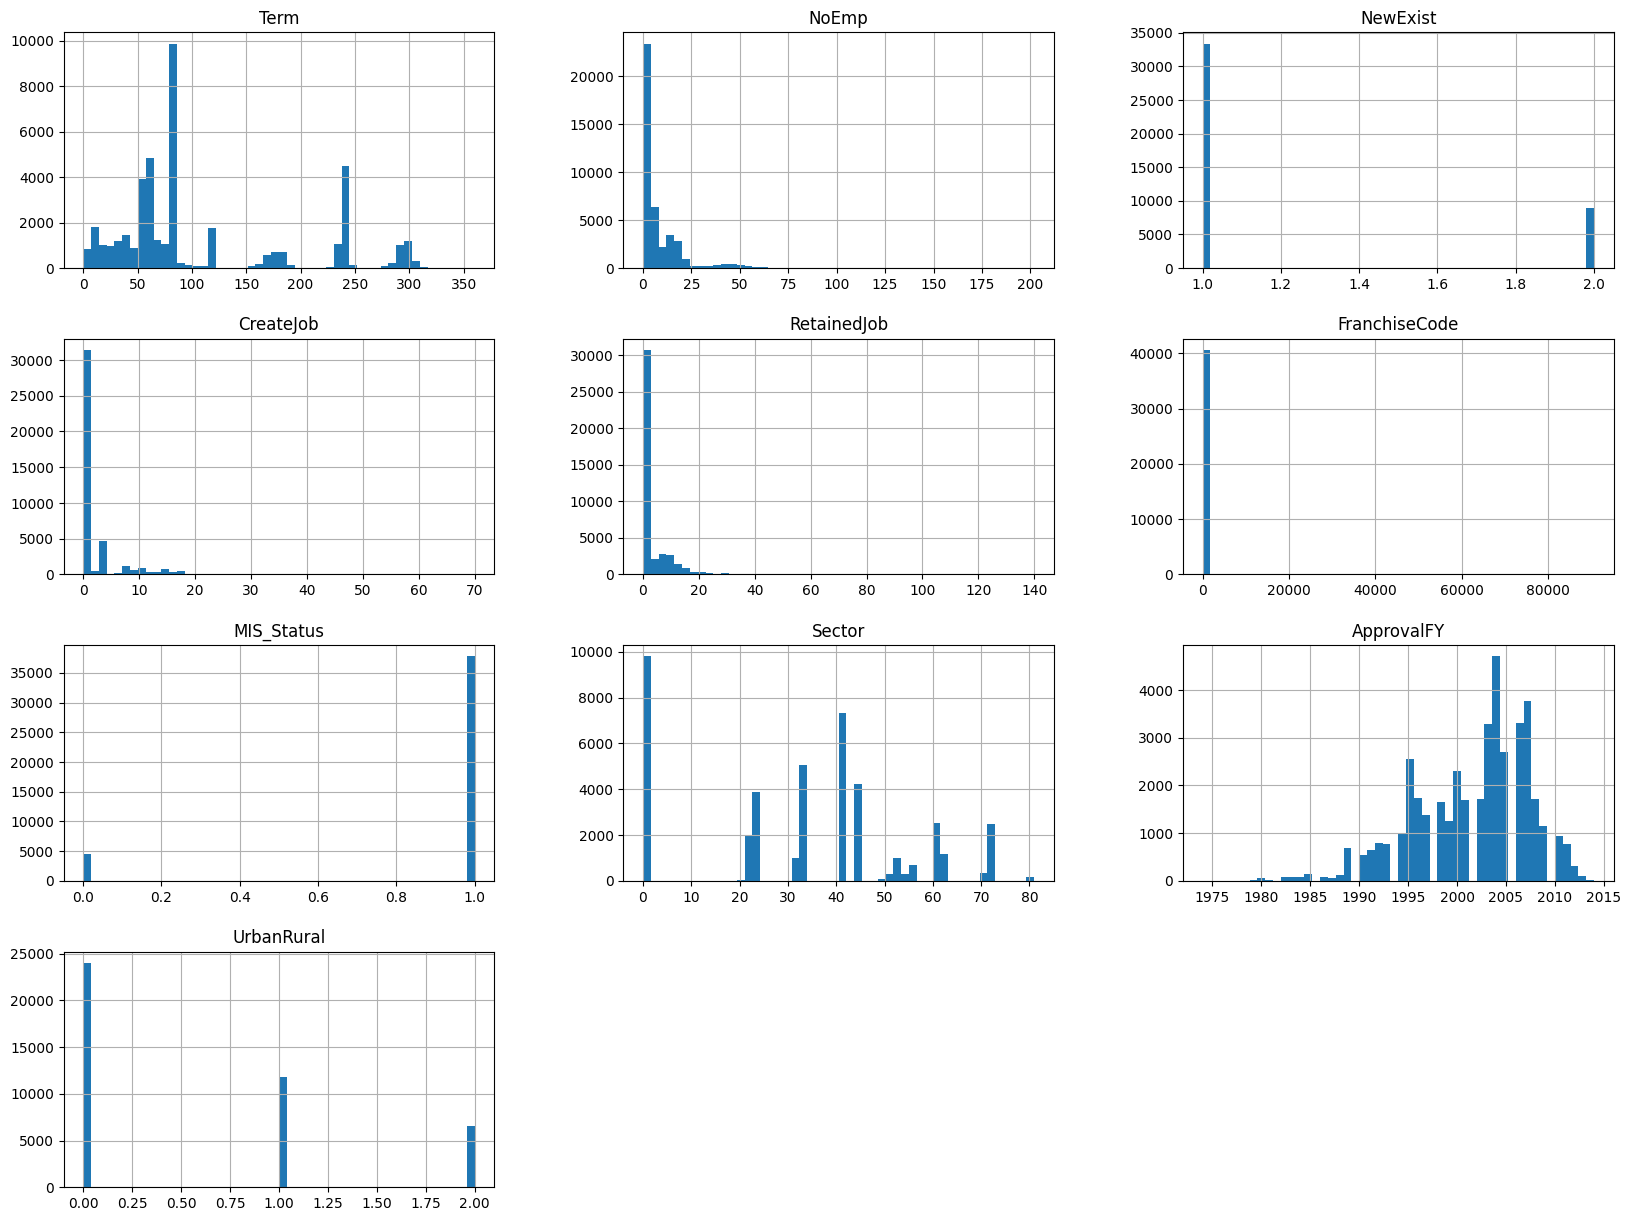

In [6]:
# 数値データのヒストグラム
train.hist(bins=50, figsize=(20,15))
plt.show()

# 相関行列

/tmp/ipykernel_1173/4238129248.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = train.corr()


                   Term     NoEmp  NewExist  CreateJob  RetainedJob  \
Term           1.000000  0.168505 -0.118428  -0.003895     0.031874   
NoEmp          0.168505  1.000000 -0.109361   0.015852     0.038647   
NewExist      -0.118428 -0.109361  1.000000  -0.090635    -0.116382   
CreateJob     -0.003895  0.015852 -0.090635   1.000000     0.151837   
RetainedJob    0.031874  0.038647 -0.116382   0.151837     1.000000   
FranchiseCode -0.039134  0.024884  0.086371   0.015446    -0.007468   
MIS_Status     0.122125  0.092940 -0.105431   0.020751     0.024734   
Sector        -0.005804 -0.028835 -0.026315   0.149672     0.175864   
ApprovalFY    -0.065524 -0.061204  0.027347  -0.023339    -0.056747   
UrbanRural    -0.194748 -0.153853  0.187410   0.006011     0.045408   

               FranchiseCode  MIS_Status    Sector  ApprovalFY  UrbanRural  
Term               -0.039134    0.122125 -0.005804   -0.065524   -0.194748  
NoEmp               0.024884    0.092940 -0.028835   -0.061204  

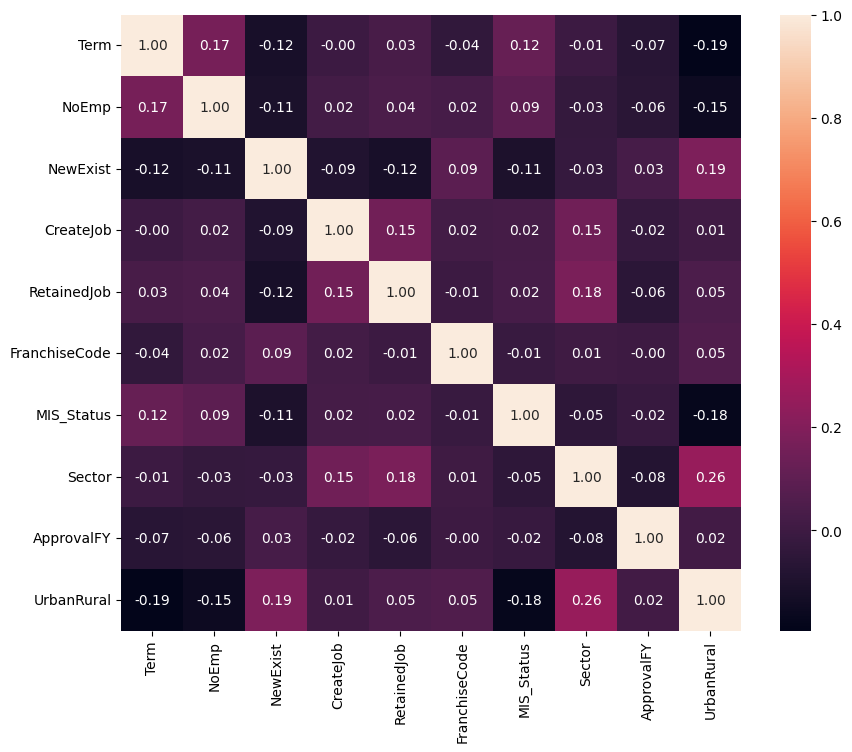

In [7]:
# 相関行列の表示
corr_matrix = train.corr()
print(corr_matrix)

# 相関行列のヒートマップ
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.show()

# 説明変数それぞれ

### データフィールドの概要

| ヘッダ名称         | 値例          | データ型 | 説明                                                       |
|------------------|--------------|--------|----------------------------------------------------------|
| City             | BILLINGS     | str    | 借り手の会社の所在地（市）                                     |
| State            | FL           | str    | 借り手の会社の所在地（州）                                     |
| BankState        | IL           | str    | 貸し手の所在地（州）                                          |
| Sector(*)        | 0            | int    | 産業分類コード (詳細は後述)                                   |
| Term             | 120          | int    | 融資の期間（月）                                              |
| NoEmp            | 2            | int    | 融資を受ける前の事業の従業員数                                  |
| NewExist         | 1.0          | float  | 新規ビジネスかどうか (*1 = 既存のビジネス、2 = 新規ビジネス)     |
| CreateJob        | 1            | int    | 企業が融資資金を使用して創出すると予想される雇用の数                |
| RetainedJob      | 0            | int    | 融資を受けたことで企業が維持すると予想される雇用の数                |
| FranchiseCode    | 21           | int    | どのブランドのフランチャイズであるかを識別する一意の5桁のコード (*0または1は非フランチャイズを意味する) |
| UrbanRural       | 1            | int    | *1 = 都市部、2 = 田舎、0 = 未定義                             |
| RevLineCr        | N            | str    | リボルビング信用枠か (*Y = はい、N = いいえ)                     |
| LowDoc           | N            | str    | 15 万ドル未満のローンを 1 ページの短い申請で処理できるプログラムか (*Y = はい、N = いいえ) |
| DisbursementDate | 12-Jan-05    | str    | 融資の支払日                                                  |
| DisbursementGross| $80,000.00   | str    | 銀行によって支払われた金額                                      |
| GrAppv           | $108,000.00  | str    | 銀行によって承認されたローンの総額                               |
| SBA_Appv         | $102,000.00  | str    | SBAが保証する承認されたローンの金額                             |
| ApprovalDate     | 30-Sep-94    | str    | 米国中小企業庁の承認日                                         |
| ApprovalFY       | 1994         | int    | 承認された財務年度                                             |
| MIS_Status       | 1            | int    | ローンの状態(目的変数) (*0 = 債務不履行、1 = 完済)                |

### 産業分類コードの意味

| カテゴリ | 意味                       | カテゴリ | 意味                     |
|---------|--------------------------|---------|------------------------|
| 11      | 農業、林業、漁業、狩猟       | 53      | 不動産、賃貸・リース       |
| 21      | 鉱業、採石業、石油・天然ガス採掘 | 54      | 専門的、科学的、技術的サービス |
| 22      | 公共事業（電力、ガス、水道）   | 55      | 企業経営管理               |
| 23      | 建設業                     | 56      | 行政支援、廃棄物・浄化サービス |
| 31~33   | 製造業                     | 61      | 教育サービス               |
| 42      | 卸売業                     | 62      | 医療、社会援助             |
| 44~45   | 小売業                     | 71      | 芸術、娯楽、レクリエーション |
| 48~49   | 運輸業、倉庫業               | 72      | 宿泊、飲食サービス         |
| 51      | 情報産業                   | 81      | その他（公共行政を除く）   |
| 52      | 金融、保険                 | 92      | 公共行政                   |

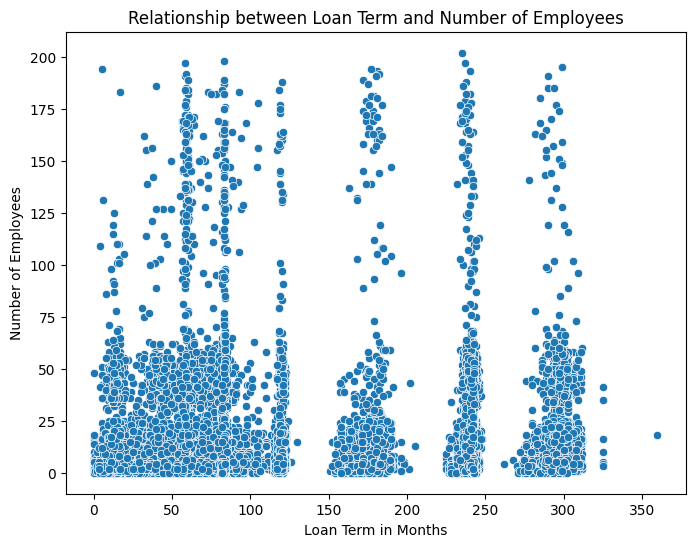

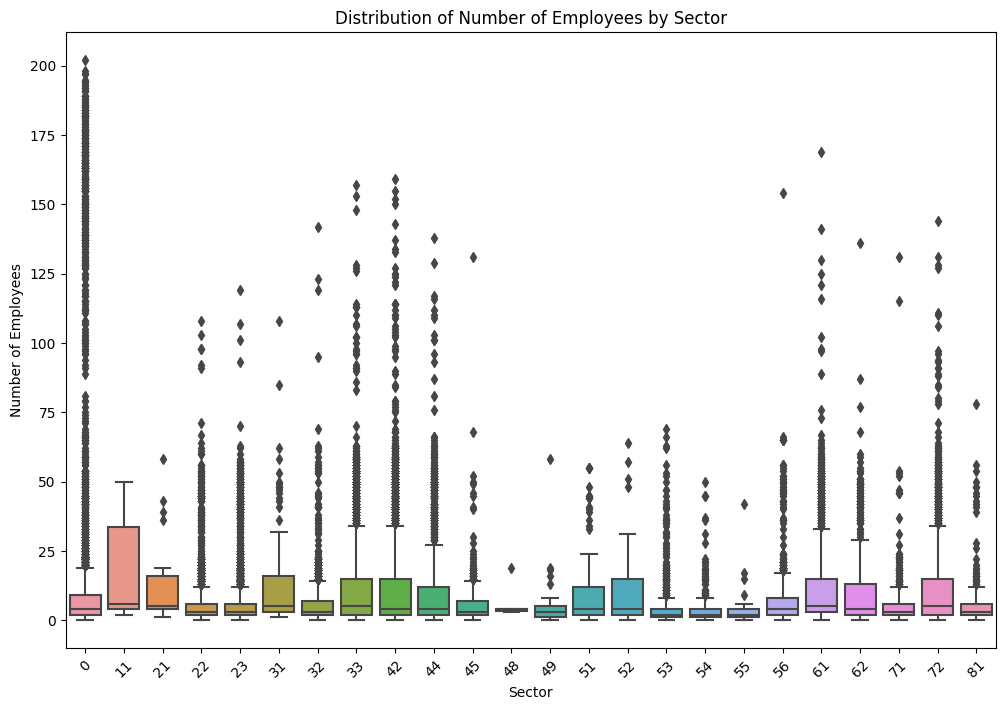

In [8]:
# 散布図の表示（例：'Term' と 'NoEmp' の関係）
plt.figure(figsize=(8,6))
sns.scatterplot(x='Term', y='NoEmp', data=train)
plt.xlabel('Loan Term in Months')
plt.ylabel('Number of Employees')
plt.title('Relationship between Loan Term and Number of Employees')
plt.show()

# ボックスプロットの表示（例：'Sector' による 'NoEmp' の分布）
plt.figure(figsize=(12,8))
sns.boxplot(x='Sector', y='NoEmp', data=train)
plt.xlabel('Sector')
plt.ylabel('Number of Employees')
plt.title('Distribution of Number of Employees by Sector')
plt.xticks(rotation=45)
plt.show()